#### Import required libraries

In [ ]:
import networkx as nx
import numpy as np
import random
import itertools
import matplotlib.pyplot as plt
from time import sleep
from tqdm import tqdm
import operator

#### Create Graph

In [138]:
with open(r'datasets\answers to questions(21days).csv', 'r') as fp:
    user_u, user_v, time_t = zip(*[line.rstrip().split(',') for line in fp])
graph = nx.Graph()


#### Draw graph

 using fruchterman reingold layout

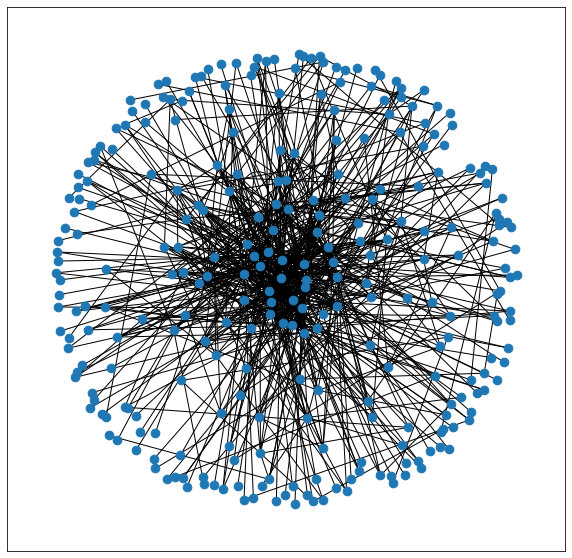

In [140]:
graph.add_edges_from(zip(user_u,user_v))
# The following nodes should be removed because in the picture of graph the are too far and it reduces focus on the main part of the graph
graph.remove_node('460')
graph.remove_node('704')
graph.remove_node('663')
graph.remove_node('76')
pos = nx.fruchterman_reingold_layout(graph, iterations=75, k=1, threshold = 0.00001, seed=1)
# Draw graph
plt.figure(figsize=(10,10))
nx.draw_networkx(graph, pos, with_labels=False, node_shape='.')
plt.savefig("General graph.png", dpi=1000)

using force atlas 2

In [ ]:
import matplotlib.pyplot as plt
import networkx
import random
import forceatlas2
pos = { i : (random.random(), random.random()) for i in graph.nodes()} 
l = forceatlas2.forceatlas2_networkx_layout(graph, pos, niter=500) 
plt.figure(figsize=(15,15))
networkx.draw_networkx(graph, l, with_labels=False, node_shape='.')
plt.savefig("forceatlas2 graph.png", dpi=1000)

#### John - degree_distribution

Find John (The maximum number of answers to questions around the network)

In [ ]:
degree_distribution = dict(graph.degree)
John_id = max(degree_distribution, key=degree_distribution.get)
John_degree = degree_distribution[John_id]
print(f'John has answered to {John_degree} number of questions, which it the highest number of questions all over the network.')
# Color the edges of John
John_edges = graph.edges([John_id])
colors = ['r' if John_edges.__contains__(edge) else 'y' for edge in graph.edges()]
plt.figure(figsize=(15,15))
# Draw using fruchterman_reingold_layout
pos = nx.fruchterman_reingold_layout(graph, iterations=75, k=1, threshold = 0.00001, seed=1)
nx.draw_networkx(graph, pos, with_labels=False, node_shape='.', edge_color=colors)
plt.savefig("John connections.png", dpi=1000)
# Draw using forceatlas2_networkx_layout
pos = { i : (random.random(), random.random()) for i in graph.nodes()} 
l = forceatlas2.forceatlas2_networkx_layout(graph, pos, niter=500) 
nx.draw_networkx(graph, l, with_labels=False, node_shape='.', edge_color=colors)
plt.savefig("John connections_forceatlas2.png", dpi=1000)

Show that John answered to a new user every time

In [ ]:
John_answered_to_users = set()
for first_id, second_id in graph.edges:
    if first_id == str(John_id):
        John_answered_to_users.add(second_id)
print(f'The number of unique users John has answered to is {John_answered_to_users.__len__()}')

#### Erick - betweenness_centrality

Find Erick (The maximum of betweenness centrality)

In [ ]:
betweenness_centrality = nx.betweenness_centrality(graph)
# sorted_betweenness_centrality = sorted(betweenness_centrality.items(), key=operator.itemgetter(1), reverse=True)
Erick_id = max(betweenness_centrality, key=betweenness_centrality.get)
Erick_centrality = betweenness_centrality[Erick_id]
print("betweenness centrality of Erick is = ", Erick_centrality)
# Color the the edges of Erick
Erick_edges = graph.edges([Erick_id])
colors = ['r' if Erick_edges.__contains__(edge) else 'y' for edge in graph.edges()]
plt.figure(figsize=(15,15))
# Draw using fruchterman_reingold_layout
pos = nx.fruchterman_reingold_layout(graph, iterations=75, k=1, threshold = 0.00001, seed=1)
nx.draw_networkx(graph, pos, with_labels=False, node_shape='.', edge_color=colors)
plt.savefig("Erick connections.png", dpi=500)
# Draw using forceatlas2_networkx_layout
pos = { i : (random.random(), random.random()) for i in graph.nodes()} 
l = forceatlas2.forceatlas2_networkx_layout(graph, pos, niter=500) 
nx.draw_networkx(graph, l, with_labels=False, node_shape='.', edge_color=colors)
plt.savefig("Erick connections_forceatlas2.png", dpi=1000)

#### Show John is Erick

In [ ]:
print(f'John\'s ID = {John_id}\nErick\'s ID = {Erick_id}')

#### Find 5 top most important users of the community

In [ ]:
import heapq
top_five_important_id = heapq.nlargest(5, betweenness_centrality, key=betweenness_centrality.get)
questions_answered = 0
top_five_edges = []
for user in top_five_important_id:
    questions_answered += graph.edges(user).__len__()
    top_five_edges += graph.edges(user)
# Color the the edges of top 5
colors = ['r' if top_five_edges.__contains__(edge) else 'y' for edge in graph.edges()]
plt.figure(figsize=(15,15))
# Draw using fruchterman_reingold_layout
nx.draw_networkx(graph, pos, with_labels=False, node_shape='.', edge_color=colors)
plt.savefig("top five connections.png", dpi=1000)
# Draw using forceatlas2_networkx_layout
pos = { i : (random.random(), random.random()) for i in graph.nodes()} 
l = forceatlas2.forceatlas2_networkx_layout(graph, pos, niter=500) 
nx.draw_networkx(graph, l, with_labels=False, node_shape='.', edge_color=colors)
plt.savefig("top five connections_forceatlas2.png", dpi=1000)

#### Jack - Knowledge broadness

Use closeness centrality

In [ ]:
closeness_centralities = nx.closeness_centrality(graph)
# sorted_closeness_centralities = sorted(closeness_centralities.items(), key=operator.itemgetter(1), reverse=True)
Jack_id = max(closeness_centralities, key=closeness_centralities.get)
Jack_centrality = closeness_centralities[Jack_id]
print("Closeness centrality of Jack is = ", Jack_centrality)
# Color the edges of Jack
pos = { i : (random.random(), random.random()) for i in graph.nodes()} 
l = forceatlas2.forceatlas2_networkx_layout(graph, pos, niter=500) 
Jack_edges = graph.edges([Jack_id])
colors = ['r' if Jack_edges.__contains__(edge) else 'y' for edge in graph.edges()]
plt.figure(figsize=(15,15))
nx.draw_networkx(graph, l, with_labels=False, node_shape='.', edge_color=colors)
plt.savefig("Jack connections.png", dpi=1000)

#### Knowledge deepness

In [ ]:
# Generate the communities
from networkx.algorithms import community
communities_generator = community.girvan_newman(graph)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
sorted(map(sorted, next_level_communities))
print(next_level_communities)

In [ ]:
# Color the nodes of each community
# colors = ['r' if John_edges.__contains__(edge) else 'y' for edge in graph.edges()]
colors = list()
colors_list = ['y', 'b', 'r']
for node in graph.nodes():
    for community_index in range(next_level_communities.__len__()):
        if node in next_level_communities[community_index]:
            colors.append(colors_list[community_index])
print(colors)
plt.figure(figsize=(15,15))
# Draw using fruchterman_reingold_layout
pos = nx.fruchterman_reingold_layout(graph, iterations=75, k=1, threshold = 0.00001, seed=1)
nx.draw_networkx(graph, pos, with_labels=False, node_shape='.', node_color=colors)
plt.savefig("communities.png", dpi=1000)
# Draw using forceatlas2_networkx_layout
pos = { i : (random.random(), random.random()) for i in graph.nodes()} 
l = forceatlas2.forceatlas2_networkx_layout(graph, pos, niter=500) 
nx.draw_networkx(graph, l, with_labels=False, node_shape='.', node_color=colors)
plt.savefig("communities_forceatlas2_networkx_layout.png", dpi=1000)

In [ ]:
# Printing the output
for community_ in next_level_communities:
    deep_knowledged = [(graph.edges(x).__len__(), x) for x in community_]
    print("Max knowledge in each community is user = ", max(deep_knowledged))

#### Eigenvector centrality - most valuable users

In [142]:
eigenvector_centrality = nx.eigenvector_centrality(graph)
max_eigenvector_centrality_id = max(eigenvector_centrality, key=eigenvector_centrality.get)
max_eigenvector_centrality = eigenvector_centrality[max_eigenvector_centrality_id]
print(f"The user {max_eigenvector_centrality_id} with eigenvector_centrality = {max_eigenvector_centrality} is the most valuable user in the community")

graph.remove_node(max_eigenvector_centrality_id)
eigenvector_centrality = nx.eigenvector_centrality(graph)
max_eigenvector_centrality_id = max(eigenvector_centrality, key=eigenvector_centrality.get)
max_eigenvector_centrality = eigenvector_centrality[max_eigenvector_centrality_id]
print(f"The user {max_eigenvector_centrality_id} with eigenvector_centrality = {max_eigenvector_centrality} is the 2nd valuable user in the community")

graph.remove_node(max_eigenvector_centrality_id)
eigenvector_centrality = nx.eigenvector_centrality(graph)
max_eigenvector_centrality_id = max(eigenvector_centrality, key=eigenvector_centrality.get)
max_eigenvector_centrality = eigenvector_centrality[max_eigenvector_centrality_id]
print(f"The user {max_eigenvector_centrality_id} with eigenvector_centrality = {max_eigenvector_centrality} is the 3rd valuable user in the community")

graph.remove_node(max_eigenvector_centrality_id)
eigenvector_centrality = nx.eigenvector_centrality(graph)
max_eigenvector_centrality_id = max(eigenvector_centrality, key=eigenvector_centrality.get)
max_eigenvector_centrality = eigenvector_centrality[max_eigenvector_centrality_id]
print(f"The user {max_eigenvector_centrality_id} with eigenvector_centrality = {max_eigenvector_centrality} is the 4th valuable user in the community")

graph.remove_node(max_eigenvector_centrality_id)
eigenvector_centrality = nx.eigenvector_centrality(graph)
max_eigenvector_centrality_id = max(eigenvector_centrality, key=eigenvector_centrality.get)
max_eigenvector_centrality = eigenvector_centrality[max_eigenvector_centrality_id]
print(f"The user {max_eigenvector_centrality_id} with eigenvector_centrality = {max_eigenvector_centrality} is the 5th valuable user in the community")

The user 1 with eigenvector_centrality = 0.32007968900077294 is the most valuable user in the community
The user 65 with eigenvector_centrality = 0.3365129361884228 is the 2nd valuable user in the community
The user 83 with eigenvector_centrality = 0.32195835022918234 is the 3rd valuable user in the community
The user 290 with eigenvector_centrality = 0.3495043816115184 is the 4th valuable user in the community
The user 2 with eigenvector_centrality = 0.28544139133379887 is the 5th valuable user in the community


#### Check how the community has rised by time

In [ ]:
# Check how often a question is answered
time_intervals = list()
for i in range(1, len(time_t)):
    time_intervals.append(int(time_t[i]) - int(time_t[i - 1]))
average_response = sum(time_intervals) / len(time_intervals)
print(f"Every {average_response / 60} minutes, an answer is submitted.")

# Check how often a new user submits an answer
answered_users = list()
answered_interval = list()
for i in range(len(user_u)):
    if user_u[i] not in answered_users:
        answered_users.append(user_u[i])
        answered_interval.append(time_t[i])
interval_difference = [int(answered_interval[i]) - int(answered_interval[i - 1]) for i in range(1, len(answered_interval))]
average_new_user = sum(interval_difference) / len(interval_difference)
print(f"Every {int(average_new_user) / 3600} hour, a new user submits an answer.")

how much time did it take to become the most valuable user in the community

In [ ]:
import networkx as nx
for i in range(1, int(len(user_u) / 35)):
    # Extract first i elements of the list
    part_user_u = user_u[:i*30]
    part_user_v = user_v[:i*30]
    part_graph = nx.Graph()
    part_graph.add_edges_from(zip(part_user_u,part_user_v))
    eigenvector_centrality = nx.eigenvector_centrality(part_graph)
    # Get the 4th most valuable person
    max_eigenvector_centrality_id = max(eigenvector_centrality, key=eigenvector_centrality.get)
    part_graph.remove_node(max_eigenvector_centrality_id)
    eigenvector_centrality = nx.eigenvector_centrality(part_graph)
    
    max_eigenvector_centrality_id = max(eigenvector_centrality, key=eigenvector_centrality.get)
    part_graph.remove_node(max_eigenvector_centrality_id)
    eigenvector_centrality = nx.eigenvector_centrality(part_graph)

    max_eigenvector_centrality_id = max(eigenvector_centrality, key=eigenvector_centrality.get)
    part_graph.remove_node(max_eigenvector_centrality_id)
    eigenvector_centrality = nx.eigenvector_centrality(part_graph)

    max_eigenvector_centrality_id = max(eigenvector_centrality, key=eigenvector_centrality.get)
    max_eigenvector_centrality = eigenvector_centrality[max_eigenvector_centrality_id]
    print(f"user {max_eigenvector_centrality_id} is the 4th most valuable user")